In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv("SBIN.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,288.000000,288.200012,279.600006,282.500000,279.915680,29703173
1,2021-01-12,280.000000,293.850006,277.899994,292.500000,289.824188,44307145
2,2021-01-13,296.000000,308.000000,294.500000,306.799988,303.993378,78042133
3,2021-01-14,306.700012,309.250000,303.799988,307.250000,304.439270,40123498
4,2021-01-15,306.799988,310.899994,301.299988,303.850006,301.070374,35307601
...,...,...,...,...,...,...,...
117,2021-07-02,420.299988,425.399994,419.000000,424.399994,424.399994,16423811
118,2021-07-05,426.500000,434.500000,424.250000,432.649994,432.649994,16483761
119,2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278
120,2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774


In [3]:
data = df.head(15)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,288.000000,288.200012,279.600006,282.500000,279.915680,29703173
1,2021-01-12,280.000000,293.850006,277.899994,292.500000,289.824188,44307145
2,2021-01-13,296.000000,308.000000,294.500000,306.799988,303.993378,78042133
3,2021-01-14,306.700012,309.250000,303.799988,307.250000,304.439270,40123498
4,2021-01-15,306.799988,310.899994,301.299988,303.850006,301.070374,35307601
5,2021-01-18,303.500000,308.649994,292.200012,294.450012,291.756378,54969750
6,2021-01-19,297.649994,302.500000,296.399994,298.600006,295.868408,35803901
7,2021-01-20,298.799988,304.700012,296.850006,302.549988,299.782257,33759304
8,2021-01-21,304.000000,305.149994,291.500000,294.850006,292.152710,29995203
9,2021-01-22,295.500000,298.000000,282.399994,283.700012,281.104706,44440810


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
Date         122 non-null object
Open         122 non-null float64
High         122 non-null float64
Low          122 non-null float64
Close        122 non-null float64
Adj Close    122 non-null float64
Volume       122 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.8+ KB


In [5]:
df.sum()

Date         2021-01-112021-01-122021-01-132021-01-142021-0...
Open                                                   45952.5
High                                                   46674.1
Low                                                    45209.1
Close                                                    45946
Adj Close                                              45626.9
Volume                                              5952296485
dtype: object

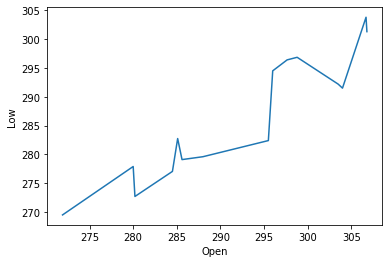

In [6]:
sns.lineplot(x="Open", y = "Low", data= data)
plt.show()

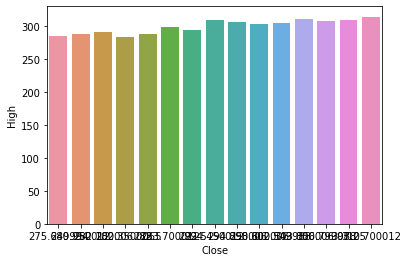

In [7]:
sns.barplot(x="Close", y = "High", data= data)
plt.show()

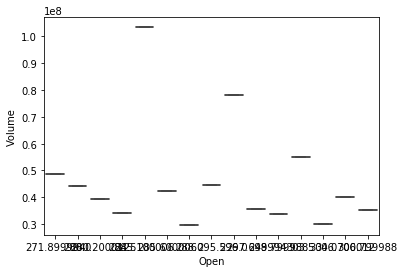

In [8]:
sns.boxplot(x="Open", y="Volume", data=data)

In [9]:
x = df.drop(columns = ["Date"],axis=1).head(10)
x

,Open,High,Low,Close,Adj Close,Volume
0,288.000000,288.200012,279.600006,282.500000,279.915680,29703173
1,280.000000,293.850006,277.899994,292.500000,289.824188,44307145
2,296.000000,308.000000,294.500000,306.799988,303.993378,78042133
3,306.700012,309.250000,303.799988,307.250000,304.439270,40123498
4,306.799988,310.899994,301.299988,303.850006,301.070374,35307601
5,303.500000,308.649994,292.200012,294.450012,291.756378,54969750
6,297.649994,302.500000,296.399994,298.600006,295.868408,35803901
7,298.799988,304.700012,296.850006,302.549988,299.782257,33759304
8,304.000000,305.149994,291.500000,294.850006,292.152710,29995203
9,295.500000,298.000000,282.399994,283.700012,281.104706,44440810


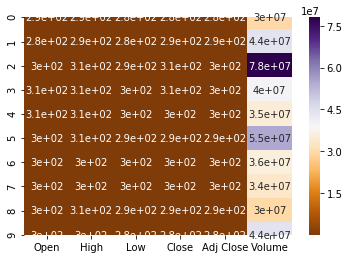

In [10]:
sns.heatmap(x,cmap='PuOr',annot=True)

In [11]:
closed_prices = df["Close"]
seq_len = 15

mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [12]:
X = []
y = []

In [13]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i + seq_len])
    y.append(scaled_price[i + seq_len])


In [14]:
X = np.array(X)[... , None]
y = np.array(y)[... , None]

In [15]:
train_x = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * X.shape[0]):]).float()



In [16]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])

In [17]:
model = Model(1 , 64)

In [18]:
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)

In [19]:
loss_fn = nn.MSELoss()

In [20]:
num_epochs = 100

In [21]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [22]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

10 epoch loss 0.010701082
20 epoch loss 0.008907034
30 epoch loss 0.006587283
40 epoch loss 0.0058460333
50 epoch loss 0.005416618
60 epoch loss 0.0052398047
70 epoch loss 0.0050177504
80 epoch loss 0.0048564854
90 epoch loss 0.0047080196


In [23]:
model.eval()
with torch.no_grad():
    output = model(test_x)

In [24]:
pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())


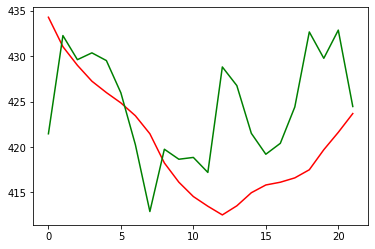

In [25]:
plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.show()
